In [36]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import struct


#PWD=os.getcwd()

#PATH=os.path.join(PWD,"SLURM_W")

PWD = "/media/juancho/TOSHIBA EXT/SC_evaluations_paper/sc2-benchmark"

PATH=os.path.join(PWD,"entropic_student/FSIM_W")

items = os.listdir(PATH)

directories = [item for item in items if os.path.isdir(os.path.join(PATH,item))]

Final_report = pd.DataFrame()

for config in directories:
    dir = os.path.join(PATH,config)    
    list_items = os.listdir(dir)    
    sim_dir=[item for item in list_items if os.path.isdir(os.path.join(dir,item))]

    #merge_files_path=os.path.join(dir,sim_dir[0])
    merge_files_path=dir
    print(sim_dir)
    full_report= pd.read_csv(os.path.join(merge_files_path,"fsim_full_report.csv"),index_col=[0])  
    full_report['MRAD']=abs(100*(full_report['fault_ACC@1']-full_report['gold_ACC@1'])/full_report['gold_ACC@1'])
    full_report['MRADk']=abs(100*(full_report['fault_ACC@k']-full_report['gold_ACC@k'])/full_report['gold_ACC@k'])
    full_report['AbsAD']=abs((full_report['fault_ACC@1']-full_report['gold_ACC@1']))
    full_report['AbsADk']=abs((full_report['fault_ACC@k']-full_report['gold_ACC@k']))
    full_report["FsimID"]=None    
    index=(full_report['gold_ACC@1']>=0)
    full_report.loc[index,'FsimID']=config # I capture the folder name and assign it to eavery roww of the dataframe
    full_report['split_config']=full_report['FsimID'].apply(lambda x: x.split('_')[0])
    full_report['bit_faulty_pos']=np.log2(full_report['bitmask']).astype(int)
    Final_report=pd.concat([Final_report,full_report],axis=0,ignore_index=True)

print(Final_report.head())

index = (Final_report['split_config']=='cnf77')
Final_report.loc[index,'split_config']=0
index = (Final_report['split_config']=='cnf1')
Final_report.loc[index,'split_config']=1
index = (Final_report['split_config']=='cnf2')
Final_report.loc[index,'split_config']=2
index = (Final_report['split_config']=='cnf3')
Final_report.loc[index,'split_config']=3
index = (Final_report['split_config']=='cnf6')
Final_report.loc[index,'split_config']=4
index = (Final_report['split_config']=='cnf9')
Final_report.loc[index,'split_config']=5
index = (Final_report['split_config']=='cnf12')
Final_report.loc[index,'split_config']=6

index = (Final_report['split_config']=='cnf0.08')
Final_report.loc[index,'split_config']=7
index = (Final_report['split_config']=='cnf5.12')
Final_report.loc[index,'split_config']=8

Final_report = Final_report.sort_values(['split_config'],ascending=True)

index = (Final_report['split_config']==0)
Final_report.loc[index,'split_config']='BaseLine'
index = (Final_report['split_config']==1)
Final_report.loc[index,'split_config']='CR+BQ(1)'
index = (Final_report['split_config']==2)
Final_report.loc[index,'split_config']='CR+BQ(2)'
index = (Final_report['split_config']==3)
Final_report.loc[index,'split_config']='CR+BQ(3)'
index = (Final_report['split_config']==4)
Final_report.loc[index,'split_config']='CR+BQ(6)'
index = (Final_report['split_config']==5)
Final_report.loc[index,'split_config']='CR+BQ(9)'
index = (Final_report['split_config']==6)
Final_report.loc[index,'split_config']='CR+BQ(12)'
index = (Final_report['split_config']==7)
Final_report.loc[index,'split_config']='VAE-B0.08'
index = (Final_report['split_config']==8)
Final_report.loc[index,'split_config']='VAE-B5.12'

indexz = (((Final_report['split_config']=='VAE-B0.08') & (Final_report['layer']<3)) | 
          ((Final_report['split_config']=='VAE-B5.12') & (Final_report['layer']<3)) |
          (((Final_report['split_config']!='VAE-B0.08') & (Final_report['split_config']!='VAE-B5.12')) 
           & (Final_report['layer']<5))
          )


Final_report = Final_report.loc[indexz]

Final_report.to_csv(os.path.join(PATH,"report.csv"))


['log']
['log']
['log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
   layer  kernel  channel  row  col    bitmask  gold_ACC@1  gold_ACC@k  \
0      0      16        2    3    4   16777216        75.0        92.0   
1      0      84        1    3    2  

In [52]:
print(Final_report.head())
index=(Final_report['split_config']=='cnf77')
Final_report.loc[index,'split_config']='ResNet50'
index=(Final_report['split_config']=='cnf01')
Final_report.loc[index,'split_config']='cnf1'
Final_report['misclasification rate']=Final_report['img_Top1_Crit']/50
Final_report['layer']=Final_report['layer'].apply(str)

  layer  kernel  channel  row  col     bitmask  gold_ACC@1  gold_ACC@k  \
0     1      50       60    1    1   134217728   73.139999   90.919998   
1     1      58       28    0    0     2097152   73.139999   90.919998   
2     1      48       23    1    1  1073741824   73.139999   90.919998   
3     1      13       55    0    0    16777216   73.139999   90.919998   
4     1      51       42    0    1    67108864   73.139999   90.919998   

   img_Top1_Crit  img_Top1_SDC  ...     Abs_error        MRAD       MRADk  \
0             22          4978  ... -4.347835e-02    0.000000    0.153981   
1             17          4983  ... -6.250000e-02    0.136722    0.043996   
2           5000             0  ...  1.089370e+38  100.000000  100.000000   
3             45          4955  ...  3.852115e-01    0.027351    0.043996   
4             42          4957  ... -7.832911e-02    0.164073    0.022002   

       AbsAD     AbsADk         FsimID  split_config  bit_faulty_pos  \
0   0.000000   0.139

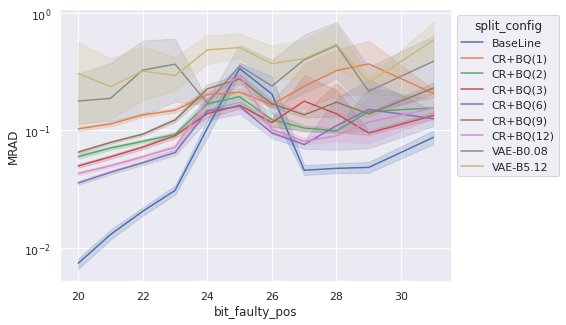

In [37]:

index = Final_report['bit_faulty_pos']!=30

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.lineplot(data=Final_report.loc[index],x='bit_faulty_pos',y='MRAD',hue='split_config')

handles, labels = plt.gca().get_legend_handles_labels()

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_yscale('log')

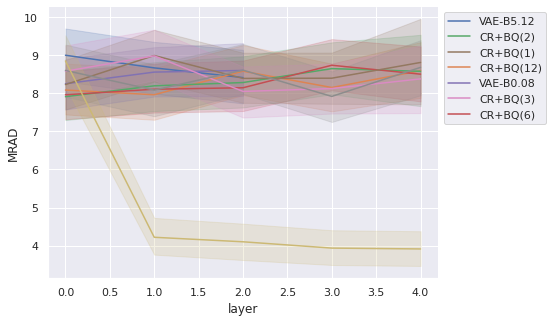

In [38]:

index = Final_report['bit_faulty_pos']>0
tmp=Final_report.loc[index]
tmp=tmp.sort_values(['layer'])

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.lineplot(data=tmp,x='layer',y='MRAD',hue='split_config')
ax.tick_params(axis='x', labelrotation=0)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,2,5,1,4,6,3]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

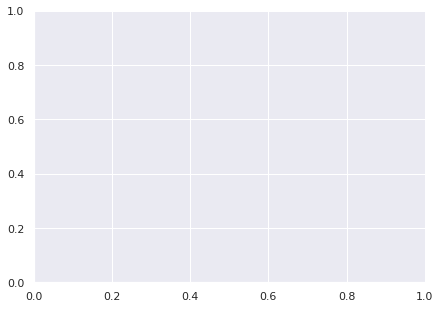

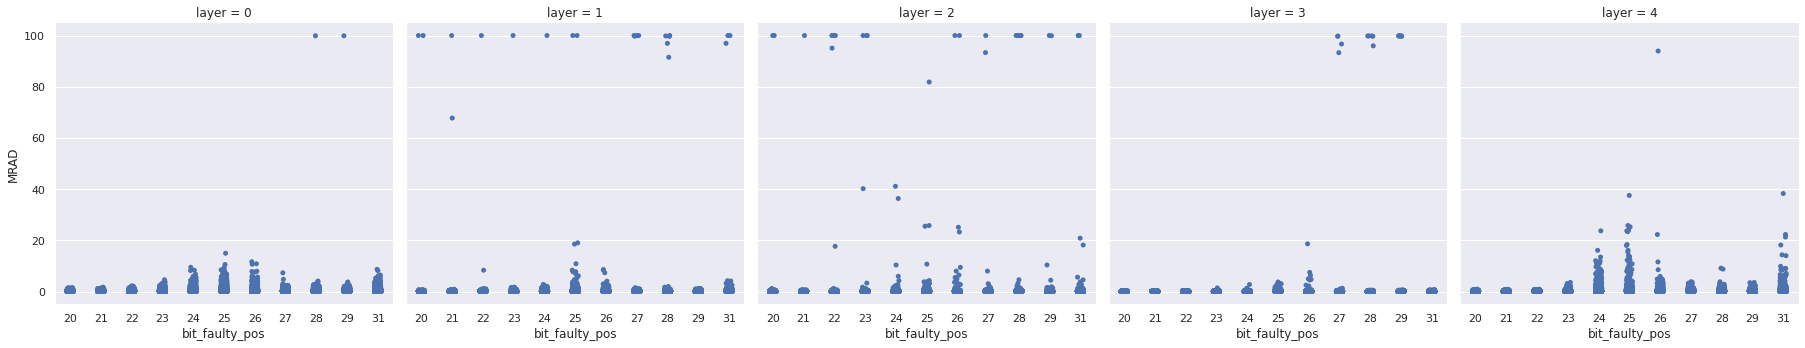

In [39]:
index = Final_report['bit_faulty_pos']!=30

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.catplot(data=Final_report.loc[index], col='layer', x='bit_faulty_pos',y='MRAD',col_wrap=7,color='C0')



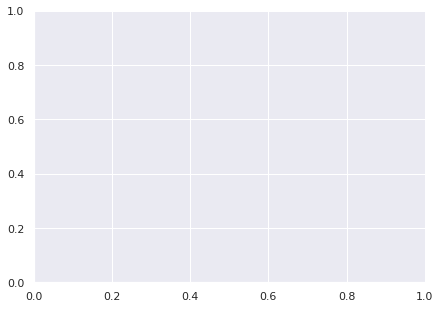

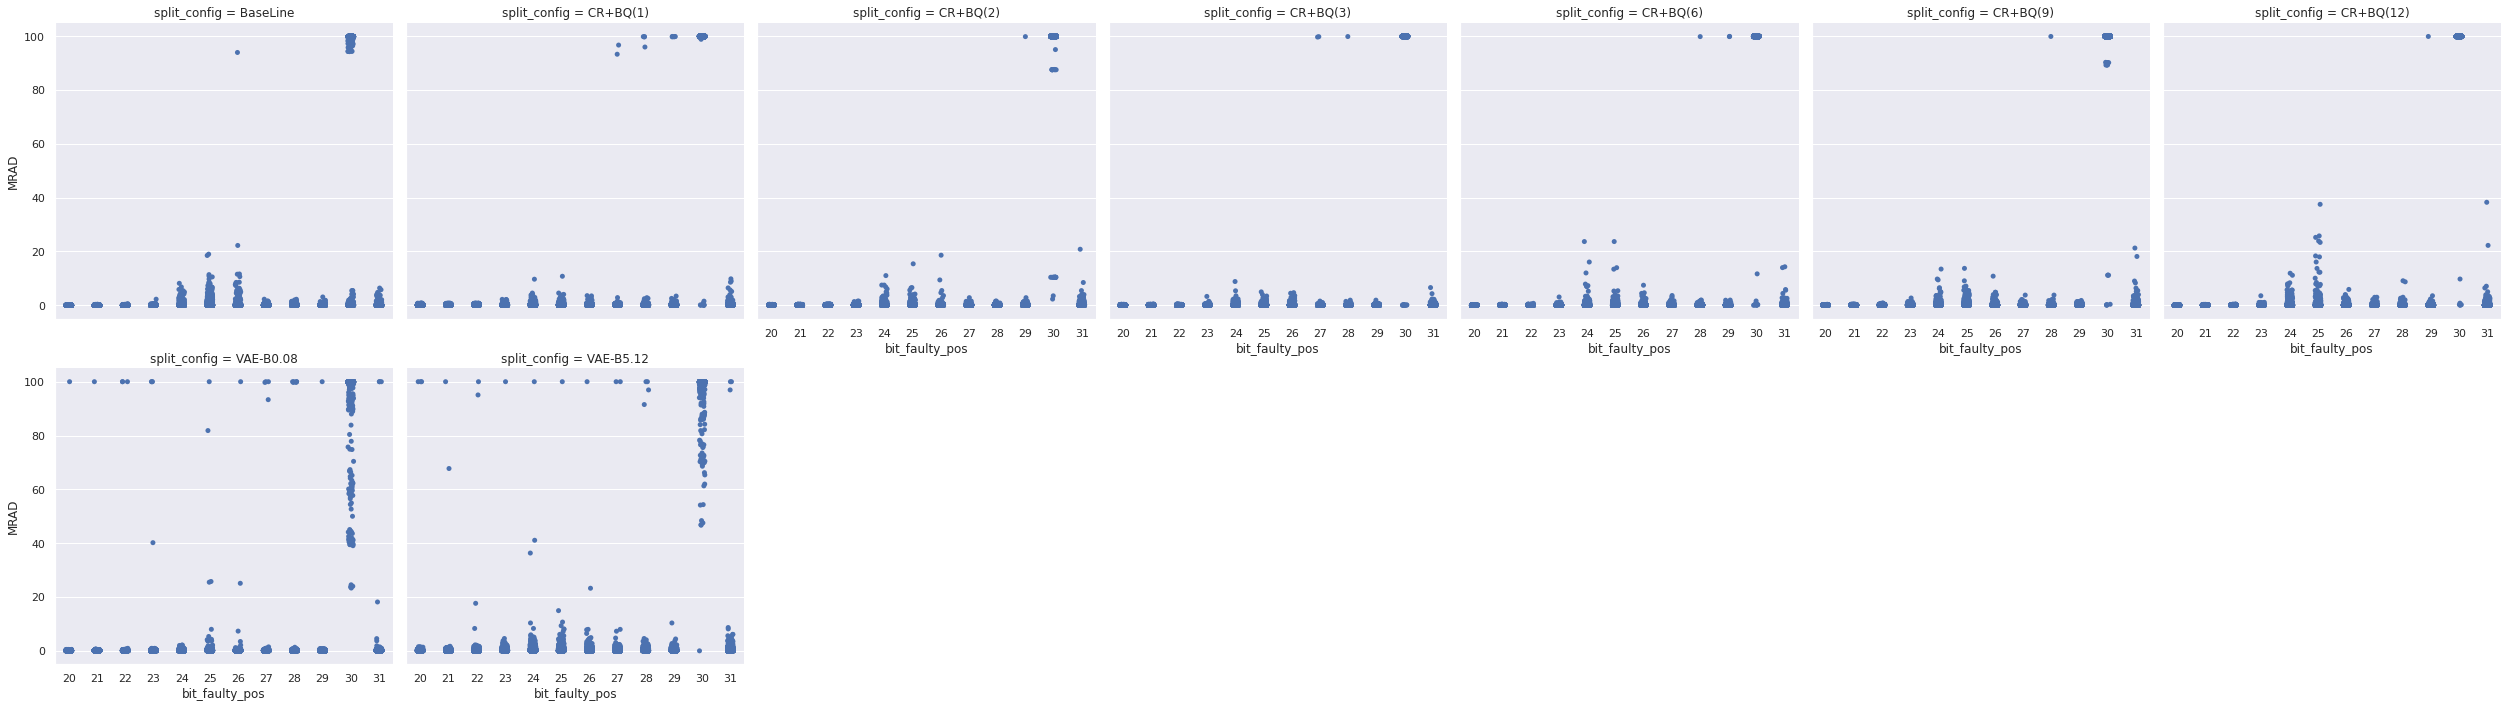

In [13]:
index = Final_report['bit_faulty_pos']>15

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.catplot(data=Final_report.loc[index], col='split_config', x='bit_faulty_pos',y='MRAD',col_wrap=7,color='C0')


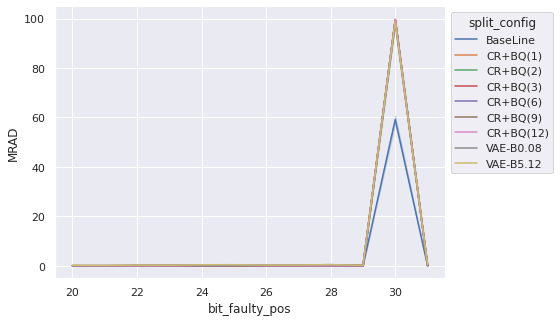

In [40]:
index = Final_report['bit_faulty_pos']>0

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.lineplot(data=Final_report.loc[index],x='bit_faulty_pos',y='MRAD', hue='split_config')

handles, labels = plt.gca().get_legend_handles_labels()

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#ax.set_yscale('log')

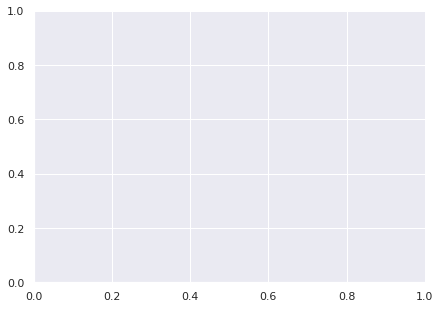

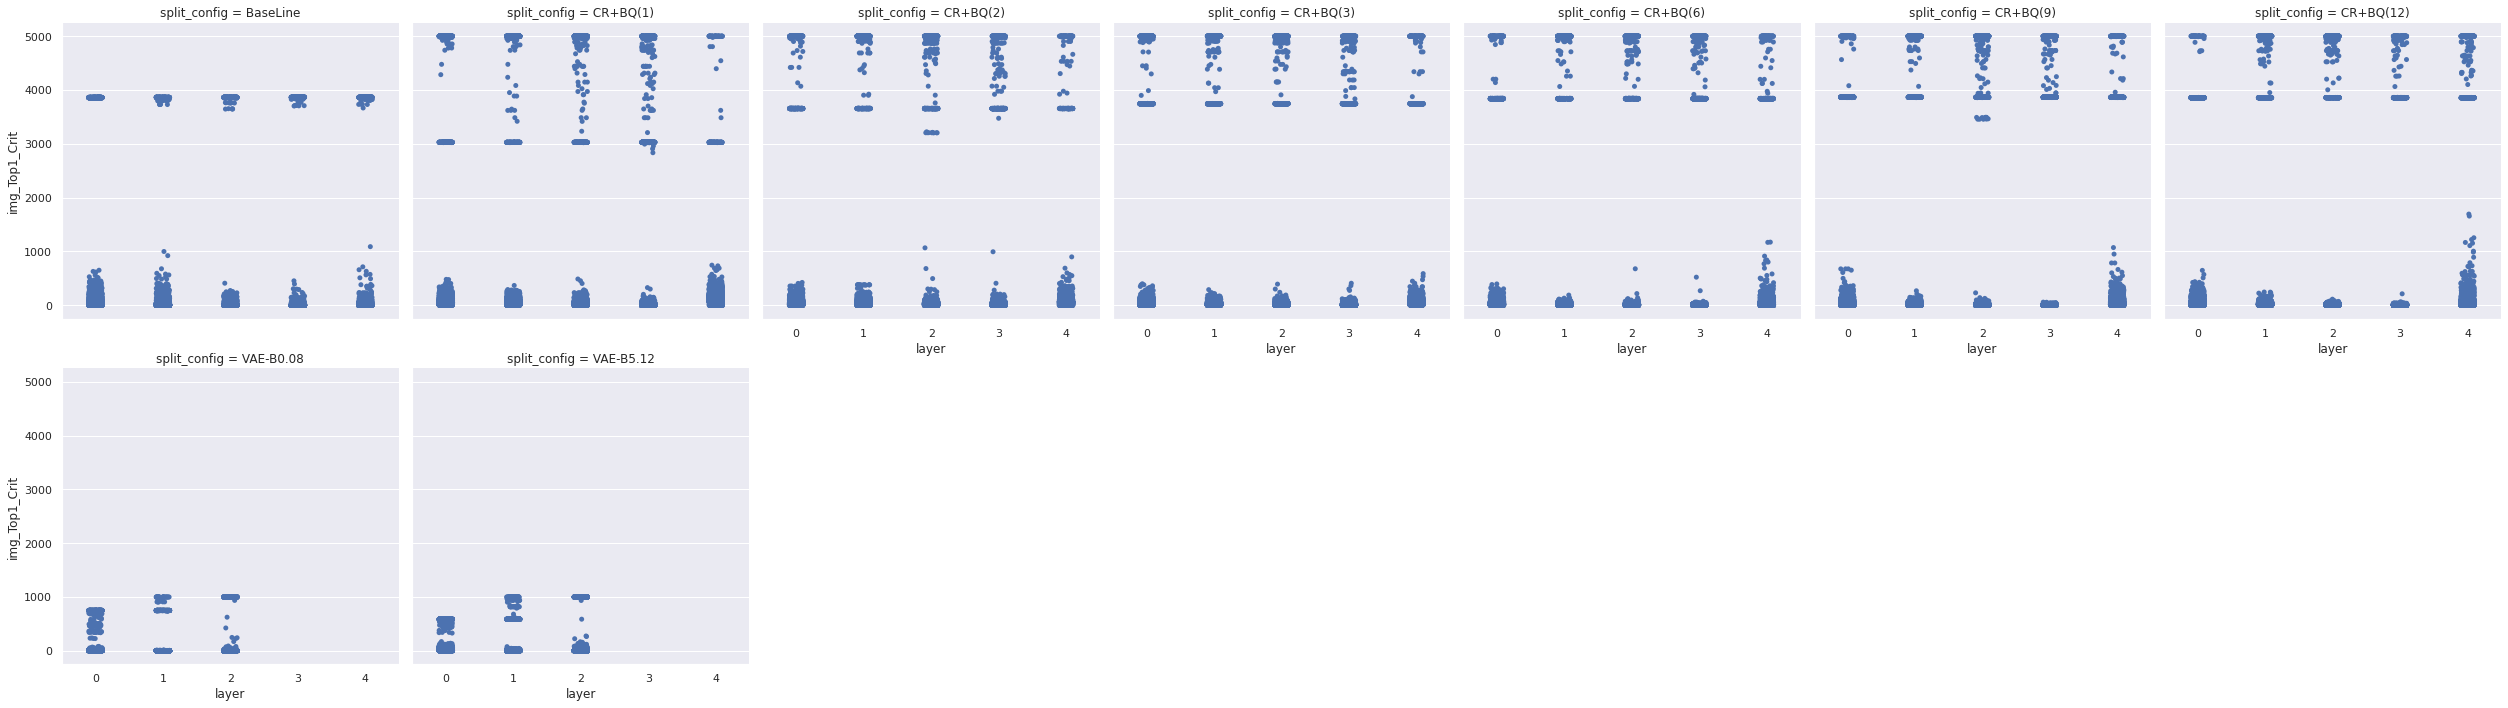

In [41]:
index = Final_report['bit_faulty_pos']>15

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.catplot(data=Final_report.loc[index], col='split_config', x='layer',y='img_Top1_Crit',col_wrap=7,color='C0')


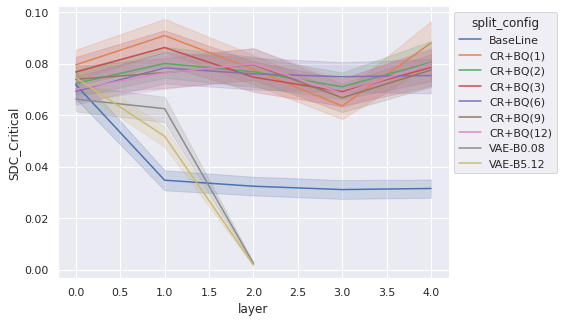

In [42]:
Final_report["SDC_Critical"]=Final_report['img_Top1_Crit']
Final_report["SDC_Safe"]=Final_report['img_Top1_SDC']
Final_report["Masked"]=Final_report['img_Top1_Masked']
Final_report["Timeout"]=0
only_timeouts=(Final_report['img_Top1_Crit']==1000) & (Final_report['img_Top1_SDC']==0) & (Final_report['img_Top1_Masked']==0) 
Final_report.loc[only_timeouts,'Timeout'] = Final_report.loc[only_timeouts,'img_Top1_Crit']
Final_report.loc[only_timeouts,"SDC_Critical"]=0


indexrate = (Final_report['split_config']=='VAE-B0.08') | (Final_report['split_config']=='VAE-B5.12')
Final_report.loc[indexrate,'SDC_Critical'] = Final_report.loc[indexrate,'SDC_Critical']/1000
Final_report.loc[indexrate,'SDC_Safe'] = Final_report.loc[indexrate,'SDC_Safe']/1000
Final_report.loc[indexrate,'Masked'] = Final_report.loc[indexrate,'Masked']/1000
Final_report.loc[indexrate,'Timeout'] = Final_report.loc[indexrate,'Timeout']/1000

Final_report.loc[~indexrate,'SDC_Critical'] = Final_report.loc[~indexrate,'SDC_Critical']/5000
Final_report.loc[~indexrate,'SDC_Safe'] = Final_report.loc[~indexrate,'SDC_Safe']/5000
Final_report.loc[~indexrate,'Masked'] = Final_report.loc[~indexrate,'Masked']/5000
Final_report.loc[~indexrate,'Timeout'] = Final_report.loc[~indexrate,'Timeout']/5000

"""
Report=pd.melt(Final_report,
               id_vars=['layer', 'kernel', 'channel', 'row', 'col', 'bitmask', 
                        'bit_faulty_pos', 'gold_ACC@1', 'gold_ACC@k',
                        'img_Top1_Crit', 'MRADk', 'AbsAD', 'AbsADk', 'FsimID', 'split_config'
                        ],
               value_vars=['SDC_Critical','SDC_Safe','Masked','Timeout'],
               var_name='Effects',
               value_name='Images')
"""


index = Final_report['bit_faulty_pos']!=-1

tmp=Final_report.loc[index]

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.lineplot(data=tmp,x='layer',y='SDC_Critical', hue='split_config')

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#ax.set_yscale('log')

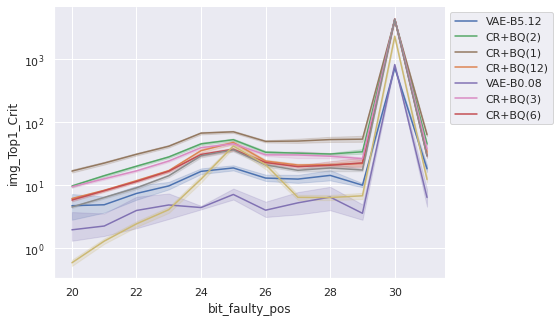

In [43]:
index = Final_report['bit_faulty_pos']>15
tmp=Final_report.loc[index]
tmp=tmp.sort_values(['layer'])

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.lineplot(data=tmp,x='bit_faulty_pos',y='img_Top1_Crit', hue='split_config')
ax.set_yscale('log')

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,2,5,1,4,6,3]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

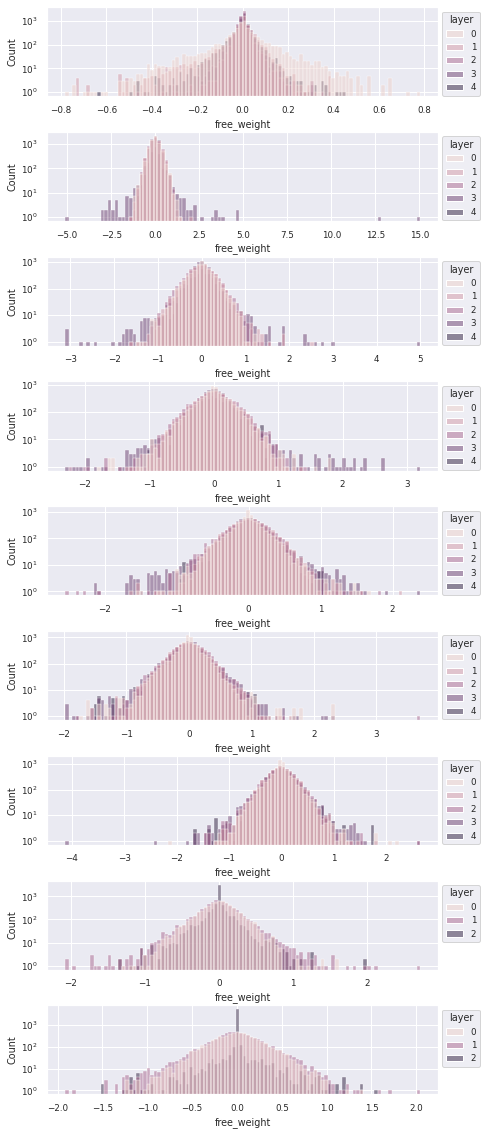

In [44]:
import struct
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 5})

def int_to_float(h):
    return float(struct.unpack(">f",struct.pack(">I",h))[0])

Final_report['free_weight']=Final_report['Ffree_Weight'].astype(int).apply(int_to_float)
Final_report['faul_weight']=Final_report['Faulty_weight'].astype(int).apply(int_to_float)

#print(Final_report.head())

CNF=['BaseLine', 'CR+BQ(1)', 'CR+BQ(2)', 'CR+BQ(3)', 'CR+BQ(6)', 'CR+BQ(9)', 'CR+BQ(12)', 'VAE-B0.08', 'VAE-B5.12']

index_neg_MRAD = (Final_report['MRAD']!=0) & (Final_report['bit_faulty_pos']!=30) 

index_no_MRAD = Final_report['MRAD']!=0


sns.set(font_scale=0.8)
fig,ax = plt.subplots(9, figsize=(7, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i=0
for cnf in CNF:
    index_cnf = (Final_report['split_config']==cnf)
    ax[i] = sns.histplot(data=Final_report.loc[index_cnf],x='free_weight',hue='layer',bins=100, ax=ax[i])
    ax[i].set_yscale('log')
    sns.move_legend(ax[i], "upper left", bbox_to_anchor=(1, 1))   
    i+=1
    # 



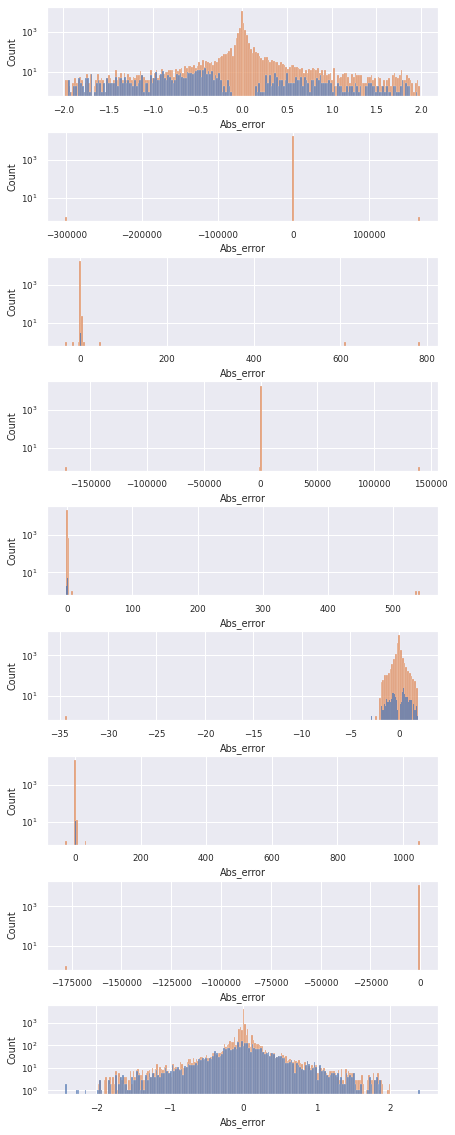

In [50]:
import struct
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 5})

def int_to_float(h):
    return float(struct.unpack(">f",struct.pack(">I",h))[0])

Final_report['free_weight']=Final_report['Ffree_Weight'].astype(int).apply(int_to_float)
Final_report['faul_weight']=Final_report['Faulty_weight'].astype(int).apply(int_to_float)

#print(Final_report.head())

CNF=['BaseLine', 'CR+BQ(1)', 'CR+BQ(2)', 'CR+BQ(3)', 'CR+BQ(6)', 'CR+BQ(9)', 'CR+BQ(12)', 'VAE-B0.08', 'VAE-B5.12']


sns.set(font_scale=0.8)
fig,ax = plt.subplots(9, figsize=(7, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i=0
for cnf in CNF:    
    index_cnfx = (Final_report['split_config']==cnf) & (Final_report['MRAD']<100) & (Final_report['bit_faulty_pos']<28)
    ax[i] = sns.histplot(data=Final_report.loc[index_cnfx],x='Abs_error',bins=200, color='C1', ax=ax[i])
    index_cnf = (Final_report['split_config']==cnf)  & (Final_report['bit_faulty_pos']!=30)  & (Final_report['MRAD']>=0) & (abs(Final_report['Abs_error'])<30)
    ax[i] = sns.histplot(data=Final_report.loc[index_cnf],x='Abs_error',bins=200, color='C0',ax=ax[i])
    ax[i].set_yscale('log')
    #sns.move_legend(ax[i], "upper left", bbox_to_anchor=(1, 1))   
    i+=1




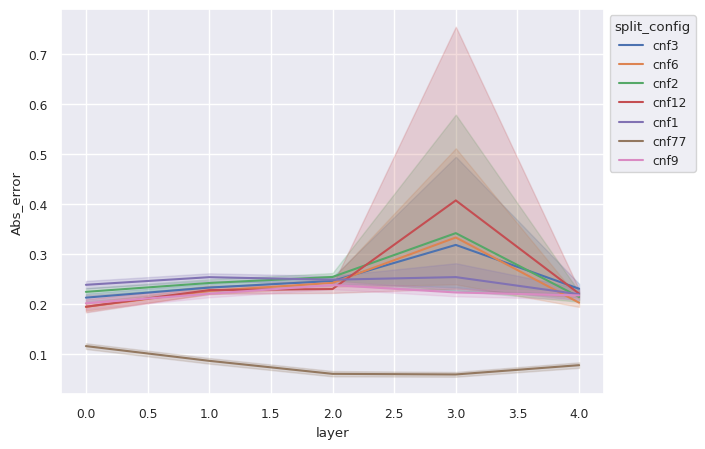

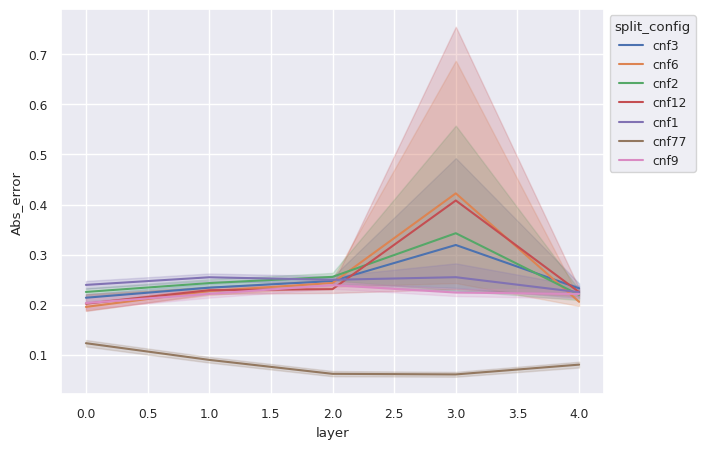

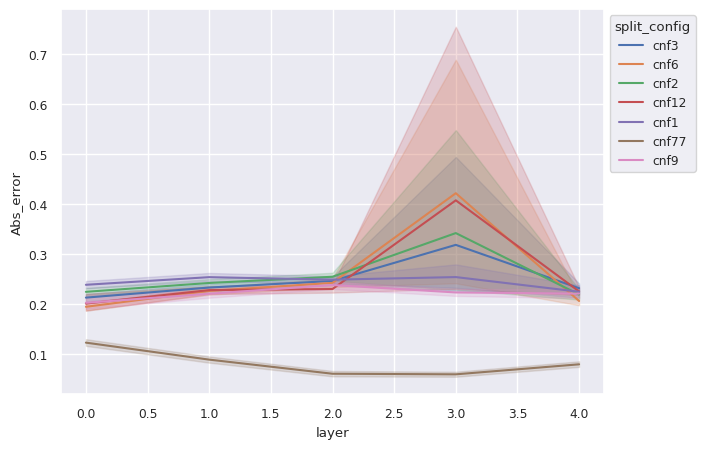

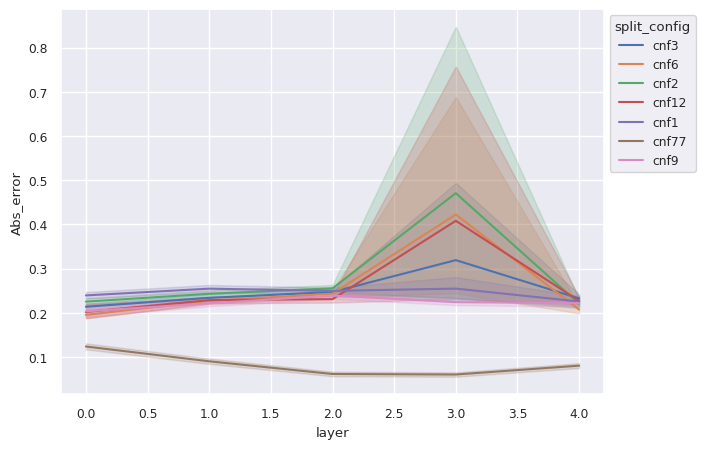

In [11]:
import struct
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 5})

def int_to_float(h):
    return float(struct.unpack(">f",struct.pack(">I",h))[0])

Final_report['free_weight']=Final_report['Ffree_Weight'].astype(int).apply(int_to_float)
Final_report['faul_weight']=Final_report['Faulty_weight'].astype(int).apply(int_to_float)
Final_report['Abs_error']=abs(Final_report['Abs_error'])
#print(Final_report.head())

CNF=['cnf1','cnf2','cnf3','cnf6','cnf9','cnf12', 'cnf77']

index_neg_MRAD = (Final_report['MRAD']!=0) & (Final_report['bit_faulty_pos']!=30) 

index_no_MRAD = Final_report['MRAD']!=0



# sns.set(font_scale=0.8)
# fig,ax = plt.subplots(7, figsize=(7, 15))
# fig.subplots_adjust(hspace=0.4, wspace=0.4)
# i=0
# for cnf in CNF:
#     index_cnf = (Final_report['split_config']==cnf)  & (Final_report['bit_faulty_pos']!=32)  & (Final_report['MRAD']!=0)
#     ax[i] = sns.lineplot(data=Final_report.loc[index_cnf],x='layer',y='Abs_error', ax=ax[i])
#     ax[i].set_yscale('log')
#     #sns.move_legend(ax[i], "upper left", bbox_to_anchor=(1, 1))   
#     i+=1

sns.set(font_scale=0.8)
fig,ax = plt.subplots(figsize=(7, 5))
index_cnf = (Final_report['bit_faulty_pos']!=30)  & (Final_report['MRAD']<5)
ax = sns.lineplot(data=Final_report.loc[index_cnf],x='layer',y='Abs_error', hue='split_config', ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))  

sns.set(font_scale=0.8)
fig,ax = plt.subplots(figsize=(7, 5))
index_cnf = (Final_report['bit_faulty_pos']!=30)  & (Final_report['MRAD']<10)
ax = sns.lineplot(data=Final_report.loc[index_cnf],x='layer',y='Abs_error', hue='split_config', ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))  


sns.set(font_scale=0.8)
fig,ax = plt.subplots(figsize=(7, 5))
index_cnf = (Final_report['bit_faulty_pos']!=30)  & (Final_report['MRAD']<15)
ax = sns.lineplot(data=Final_report.loc[index_cnf],x='layer',y='Abs_error', hue='split_config', ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))  


sns.set(font_scale=0.8)
fig,ax = plt.subplots(figsize=(7, 5))
index_cnf = (Final_report['bit_faulty_pos']!=30)  & (Final_report['MRAD']<20)
ax = sns.lineplot(data=Final_report.loc[index_cnf],x='layer',y='Abs_error', hue='split_config', ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))  
#ax.set_yscale('log')

In [51]:
import struct
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 5})

def int_to_float(h):
    return float(struct.unpack(">f",struct.pack(">I",h))[0])

Final_report['free_weight']=Final_report['Ffree_Weight'].astype(int).apply(int_to_float)
Final_report['faul_weight']=Final_report['Faulty_weight'].astype(int).apply(int_to_float)

#print(Final_report.head())

CNF=['BaseLine', 'CR+BQ(1)', 'CR+BQ(2)', 'CR+BQ(3)', 'CR+BQ(6)', 'CR+BQ(9)', 'CR+BQ(12)', 'VAE-B0.08', 'VAE-B5.12']

Final_report['InRange']=None
Final_report['FaultyRange']=None

index =((Final_report['free_weight']>=0) & (Final_report['free_weight']<1))
Final_report[index,'InRange']="0<x<1"

index =((Final_report['free_weight']>=1) & (Final_report['free_weight']<2))
Final_report[index,'InRange']="1<x<2"

index =((Final_report['free_weight']>=2) )
Final_report[index,'InRange']="x>2"


index =((Final_report['faul_weight']<=Final_report['free_weight'].max()) 
        & (Final_report['faul_weight']>=Final_report['free_weight'].min()))

Final_report[index,'FaultyRange']="inside"
Final_report[~index,'FaultyRange']="Outside"



sns.set(font_scale=0.8)
fig,ax = plt.subplots(9, figsize=(7, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i=0
for cnf in CNF:    
    index_cnfx = (Final_report['FaultyRange']=="inside")
    ax[i] = sns.histplot(data=Final_report.loc[index_cnfx],x='free_weight',bins=200, color='C1', ax=ax[i])
    ax[i] = sns.histplot(data=Final_report.loc[~index_cnfx],x='free_weight',bins=200, color='C0',ax=ax[i])
    ax[i].set_yscale('log')
    #sns.move_legend(ax[i], "upper left", bbox_to_anchor=(1, 1))   
    i+=1



TypeError: unhashable type: 'Series'